In [35]:
# Nama :Muardy Muhammad Junius
# kelas : Belajar Machine Learning untuk Pemula
# No. Telp : 082210164325
# tempat tanggal lahir : kota tangerang 4 juni 1999
# kota dan kabupaten saat ini : Tangerang Selatan
# pendidikan terakhir : SMK
# institusi saat ini : Telkom University
# pekerjaan profesi saat ini : Mahasiswa

In [36]:
import tensorflow as tf #memasukan library tensorflow untuk pembelajaran mesin
import shutil #memasukan library yang berfungsi untuk mengoperasikan objek suatu file
import zipfile,os #memasukan library ziplfile untuk mengoperasikan zipfile dan library os berfungsi untuk berinteraksi dengan sistem informasi
from sklearn.model_selection import train_test_split #memasukan library train test split berfungsi untuk membagi suatu data ke dalam train test 
from tensorflow.keras.preprocessing.image import ImageDataGenerator #memasukan library imagedata generanotr yang didapatkan dari tensorflow keras preprocessing
import numpy as np #memasukan library numpy berfungsi untuk pengoperasian array
from google.colab import files #memasukan library files dari colab yang berfungsi untuk mengoperasikan file ketika sedang menjalankan colab 
from keras.preprocessing import image #memasukan library image pada library keras berfungsi untuk melakukan preprocessing pada file image
import matplotlib.pyplot as plt #memasukan library pyplot berfungsi untuk menampilkan grafik 
import matplotlib.image as mpimg #memasukan library image yang berfungsi untuk menampilkan grafik dalam bentuk image 
from google.colab import drive #memasukan library drive dari colab yang berfungsi untuk mengakses file yang terdapat pada google drive
print(tf.__version__) #menampilkan versi tensorflow

drive.mount('/content/gdrive') #memasukan google drive folder ke colab 

2.4.1
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
  
  local_zip = '/content/gdrive/MyDrive/rockpaperscissors.zip' #mengakses folder dataset pada google drive
  zip_ref = zipfile.ZipFile(local_zip, 'r') #membaca folder dataset 
  zip_ref.extractall('/tmp')#mengekstrak folder dataset dan menaruhnya pada direktori /tmp
  zip_ref.close() #menyudahi operasi 

In [38]:
 base_dir = '/tmp/rockpaperscissors' #menjabarkan sebagai direktori dataset 

train_dir = os.path.join(base_dir,'train') #menjabarkan train direktori pada direktori dataset  
validation_dir = os.path.join(base_dir, 'val') #menjabarkan Validation direktori pada direktori dataset
#membuat logika pembuatan direktori 
if not os.path.exists(train_dir): #jika train direktori tidak tersedia 
  os.mkdir(train_dir) #maka buat train direktori 
if not os.path.exists(validation_dir):#jika validatin direktori tidak tersedia
  os.mkdir(validation_dir) #maka buat validation direktori

In [39]:
rock = os.path.join(base_dir,'rock') #menjabarkan direktori rock pada direktori utama
paper = os.path.join(base_dir, 'paper')#menjabarkan direktori paper pada direktori utama
scissors = os.path.join(base_dir, 'scissors') #menjabarkan direktori scissors pada direktori utama

In [40]:
train_rock = os.path.join(train_dir, 'rock')#menjabarkan direktori rock pada direktori train
train_paper = os.path.join(train_dir, 'paper')#menjabarkan direktori paper pdaa direktori train
train_scissors = os.path.join(train_dir, 'scissors')#menjabarkan direktori scissors pada direktori train
val_rock = os.path.join(validation_dir, 'rock')#menjabarkan direktori rock pada direktori validation
val_paper = os.path.join(validation_dir, 'paper')#menjabarkan direktori paper pdaa direktori validation
val_scissors = os.path.join(validation_dir, 'scissors')#menjabarkan direktori scissors pada direktori validation






In [41]:

#melakukan pembagian data pada masing-masing target yaitu pada train data sebesar 60% dan pada test data sebesar 40%
train_rock_direktori, val_rock_direktori = train_test_split(os.listdir(rock), test_size=0.4)

train_paper_direktori, val_paper_direktori = train_test_split(os.listdir(paper), test_size=0.4)

train_scissors_direktori, val_scissors_direktori = train_test_split(os.listdir(scissors), test_size=0.4)
#membuat logika pembuatan file train dan validation untuk masing-masing target
if os.path.exists(train_rock): #jika terdapat file rock pada file train
  shutil.rmtree(train_rock) # maka hapus file train rock 
if os.path.exists(train_paper): #jika terdapat file paper pada file train
  shutil.rmtree(train_paper) # maka hapus file train paper
if os.path.exists(train_scissors): #jika terdapat file scissors pada pile train
  shutil.rmtree(train_scissors)  #maka hapus file train scissors

if os.path.exists(val_scissors): #jika terdapat file scissors pada file validation 
  shutil.rmtree(val_scissors) #maka hapus file validation scissors
if os.path.exists(val_paper): #jika terdapat file paper pada file validation
  shutil.rmtree(val_paper) #maka hapus file validation paper 
if os.path.exists(val_rock): #jika terdapat file rock pada file validation 
  shutil.rmtree(val_rock)  #maka hapus file validation rock 

if not os.path.exists(train_rock): #jika tidak terdapat file rock pada file train
  os.mkdir(train_rock) # maka buat file train rock 
if not os.path.exists(train_paper):#jika tidak terdapat file paper pada file train
  os.mkdir(train_paper)# maka buat file train paper
if not os.path.exists(train_scissors): #jika tidak terdapat file scissors pada pile train
  os.mkdir(train_scissors)#maka buat file train scissors


if not os.path.exists(val_rock):  #jika tidak terdapat file rock pada file validation 
  os.mkdir(val_rock)#maka buat file validation rock
if not os.path.exists(val_paper): #jika tidak terdapat file paper pada file validation
  os.mkdir(val_paper)#maka buat file validation paper
if not os.path.exists(val_scissors):#jika tidak terdapat file scissors pada file validation 
  os.mkdir(val_scissors)#maka buat file validation scissors

In [42]:
# mensalin data train dan data val ke directory baru sesuai dengan train test split yang dijalankan sebelumnya


for i in train_rock_direktori:
  shutil.copy(os.path.join(rock, i), os.path.join(train_rock, i)) #mensalin data rock kedalam train rock 
for i in train_paper_direktori:
  shutil.copy(os.path.join(paper,i), os.path.join(train_paper,i)) #mensalin data paper kedalam train paper
for i in train_scissors_direktori:
  shutil.copy(os.path.join(scissors,i), os.path.join(train_scissors,i)) #mensalin data scissors kedalam train scissors

for i in val_rock_direktori:
  shutil.copy(os.path.join(rock, i), os.path.join(val_rock,i)) #mensalin data rock kedalam validation rock
for i in val_paper_direktori:
  shutil.copy(os.path.join(paper,i), os.path.join(val_paper,i)) #mensalin data paper kedalam validation paper
for i in val_scissors_direktori:
  shutil.copy(os.path.join(scissors,i), os.path.join(val_scissors,i)) #mensalin data scissors kedalam validation scissors

In [43]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale = 1./225, #rescale nilai pixel yang memiliki nilai 1-256 menjadi 0-1
    rotation_range = 20, #berfungsi untuk memutar gambar
    horizontal_flip = True, #berfungsi untuk memutar gambar secara horizontal
    shear_range = 0.2, #berfungsi untuk menggeser sudut gambar
    fill_mode = 'nearest') #setting fill mode dengan metode nearest

test_datagen = ImageDataGenerator(
    rescale = 1./225, #rescale nilai pixel yang memiliki nilai 1-256 menjadi 0-1
    rotation_range = 20,#berfungsi untuk memutar gambar
    horizontal_flip = True,#berfungsi untuk memutar gambar secara horizontal
    shear_range = 0.2, #berfungsi untuk menggeser sudut gambar
    fill_mode = 'nearest')#setting fill mode dengan metode nearest


In [44]:
#objek image data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(100,150),#mengubah resolusi seluruh gambar menjadi 100x150 
    batch_size = 32, #merupakan jumlah pemorsesan gambar dalam sekali epochs
    class_mode = 'categorical' #class mode menggunakan categorical karena memiliki 3 target 
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size =(100,150),#mengubah resolusi seluruh gambar menjadi 100x150 
    batch_size = 32, #merupakan jumlah pemorsesan gambar dalam sekali epochs
    class_mode = 'categorical' #class mode menggunakan categorical karena memiliki 3 target 
)
#data train terdapat 1312
#data test terdapat  876

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [45]:
# membuat model sekuensial 
model = tf.keras.models.Sequential([ 
    #layer pertama yaitu sebagai layer penerima input data
    #jumlah filter 16, ukuran kernel 3x3 dan menggunakan fungsi aktivasi relu 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)), #menggunakan conv2d karena data yang di olah berupa gambar 2 dimensi 
    tf.keras.layers.MaxPooling2D(2,2), #kemudian maxpooling2d berfungsi untuk  mengambil nilai terbesar dari pixel data sehingga dapat memperkecil pemetaan fitur 
    #layer kedua 
    #jumlah filter 32 ukuran kernel 3x3 dengan menggunakan fungsi aktivasi relu 
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #layer ketiga 
    #jumlah filter 64 ukuran kernel 3x3 dengan menggunakan fungsi aktivasi relu 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #layer keempat 
    #jumlah filter 128 ukuran kernel 3x3 dengan menggunakan fungsi aktivasi relu 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flatten data berfungsi untuk mengubah fitur 3D menjadi 1D 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    #layer output menggunakan aktivasi relu dan softmax karena data berupa kategorikal yaitu memiliki lebih dari 2 target
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #menggunakan loss function categorical crossentropy, optimizer adam dan parameter pelatihan menggunakan akurasi 


In [47]:
history = model.fit(
    train_generator, #melatih data menggunakan image data generator sehingga dapat melabeli gambar secara otomatis berdasarkan direktori penyimpanan gambar terkait
    steps_per_epoch = 32, #merupakan jumlah iterasi pada setiap batch 
    epochs = 20, #merupakan jumlah perulangan pelatihan setiap cycle
    validation_data = validation_generator, #menggunakan validation generator 
    validation_steps = 8, #merupakan jumlah perulangan validasi pada setiap iterasi latih
    verbose =2 #berfungsi untuk keterangan epochs pada saat training berlangsung
)

Epoch 1/20
32/32 - 23s - loss: 0.9298 - accuracy: 0.4980 - val_loss: 0.5124 - val_accuracy: 0.8086
Epoch 2/20
32/32 - 22s - loss: 0.4401 - accuracy: 0.8301 - val_loss: 0.3971 - val_accuracy: 0.8711
Epoch 3/20
32/32 - 22s - loss: 0.2774 - accuracy: 0.9043 - val_loss: 0.2212 - val_accuracy: 0.9102
Epoch 4/20
32/32 - 22s - loss: 0.2550 - accuracy: 0.9180 - val_loss: 0.2001 - val_accuracy: 0.9258
Epoch 5/20
32/32 - 21s - loss: 0.1869 - accuracy: 0.9414 - val_loss: 0.1762 - val_accuracy: 0.9414
Epoch 6/20
32/32 - 22s - loss: 0.2298 - accuracy: 0.9189 - val_loss: 0.1538 - val_accuracy: 0.9609
Epoch 7/20
32/32 - 22s - loss: 0.1592 - accuracy: 0.9492 - val_loss: 0.1265 - val_accuracy: 0.9688
Epoch 8/20
32/32 - 22s - loss: 0.1570 - accuracy: 0.9443 - val_loss: 0.1433 - val_accuracy: 0.9453
Epoch 9/20
32/32 - 22s - loss: 0.1270 - accuracy: 0.9521 - val_loss: 0.1181 - val_accuracy: 0.9727
Epoch 10/20
32/32 - 22s - loss: 0.1374 - accuracy: 0.9590 - val_loss: 0.1302 - val_accuracy: 0.9648
Epoch 11/

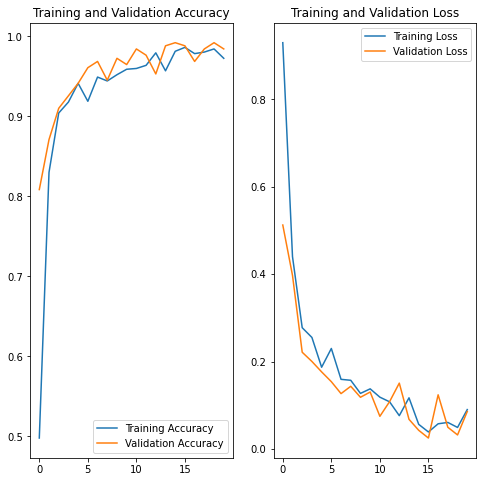

In [48]:
#menampilkan grafik secara inline dengan notebook 
%matplotlib inline
 

acc = history.history['accuracy'] #variabel penyimpan histori akurasi 
val_acc = history.history['val_accuracy']#variabel penyimpan histori akurasi validasi

loss = history.history['loss'] #variabel penyimpan histori loss
val_loss = history.history['val_loss'] #variabel penyimpan validation loss

epochs_range = range(20) #variabel penyimpan range dari epochs yaitu sebesar 20 

plt.figure(figsize=(8, 8)) #ukuran dari grafik ya akan ditampilkan 
plt.subplot(1, 2, 1) #menjabarkan grafik pertama 
plt.plot(epochs_range, acc, label='Training Accuracy')#menampilkan grafik dimana sumbu x adalah range epochs dan sumbu y adalah akurasi dengan label training accuracy
plt.plot(epochs_range, val_acc, label='Validation Accuracy')#menampilkan grafik dimana sumbu x adalah range epochs dan sumbu y adalah validasi akurasi dengan label validation accuracy
plt.legend(loc='lower right') #menjabarkan letak keterangan dari grafik 
plt.title('Training and Validation Accuracy') #menjabarkan judul dari grafik

plt.subplot(1, 2, 2)#menjabarkan grafik kedua
plt.plot(epochs_range, loss, label='Training Loss')#menampilkan grafik dimana sumbu x adalah range epochs dan sumbu y adalah loss dengan label training loss
plt.plot(epochs_range, val_loss, label='Validation Loss')#menampilkan grafik dimana sumbu x adalah range epochs dan sumbu y adalah validation loss dengan label validation loss
plt.legend(loc='upper right')#menjabarkan letak keterangan dari grafik
plt.title('Training and Validation Loss')#menjabarkan judul grafik
plt.show()#menampilkan grafik keseluruhan

#dapat dilihat model yang didapatkan goodfit karena nilai training loss lebih besar daripada validation loss (training loss>validation loss)

[[0. 1. 0.]]
		 rock


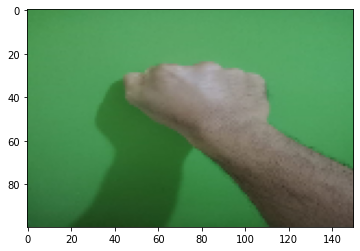

[[1. 0. 0.]]
		 paper


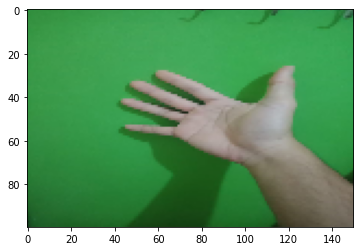

[[0. 0. 1.]]
		 scissors


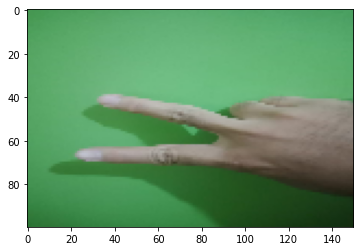

In [49]:
#menampilkan grafik secara inline dengan notebook 
%matplotlib inline


dir_path= '/content/gdrive/MyDrive/testdata' #variabel penyimpan data yang akan ditest
for i in os.listdir(dir_path ): #pengulangan sebanyak data yang terdapat pada file direktori
    img = image.load_img(dir_path + '//' + i, target_size=(100,150)) #menginput file gambar pada direktori sebesar 100x150
    x = image.img_to_array(img) #mengubah image dalam bentuk array 
    x = np.expand_dims(x, axis=0)#menyusun array dimensi dengan fungsi nparray
    

    images = np.vstack([x]) #menumpuk aray input secara vertikal untuk membuat single array
    classes = model.predict(images, batch_size=10) #memprediksi data gambar 
   
    print(classes)
    #membuat logika prediksi 
    if classes[0][0] == 1: #jika baris 0 kolom 0 sama dengan 1 
        print('\t\t paper') #maka print paper
    elif classes[0][1] == 1: #jika baris 0 kolom 1 sama dengan 1 
        print('\t\t rock') #maka print rock
    elif classes[0][2] == 1: #jika baris 0 kolom 2 sama dengan 1 
        print('\t\t scissors') #maka print scissors
    plt.imshow(img) #memangil gambar yang ingin ditampilkan
    plt.show() #menampilkan gambar

Saving WhatsApp Image 2021-02-09 at 16.52.04.jpeg to WhatsApp Image 2021-02-09 at 16.52.04 (6).jpeg
WhatsApp Image 2021-02-09 at 16.52.04.jpeg
rock


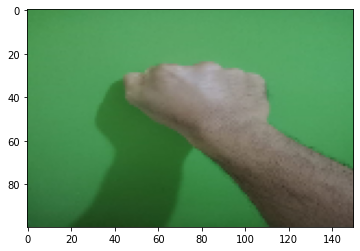

In [50]:
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    elif classes[0][2] == 1:
        print('scissors')

